# Regresyon Modelleri için Hata Değerlendirme
---

## Veri Seti Hikayesi
- Çalışanların deneyim yılı ve maaş bilgileri tablo olarak verilmiştir.
---
- **Ek Bilgi:** Regresyon modelleri, bir bağımsız değişken veya değişkenlerin, bir veya daha fazla bağımlı değişken üzerindeki etkisini analiz etmek için kullanılan istatistiksel yöntemlerdir. Bu modeller, bağımlı değişkenin sürekli bir değer alması durumunda kullanılır.(2,343,54,6,7658,88,8,....)
- Regresyon modelleri genellikle iki kategoriye ayrılır: lineer regresyon ve doğrusal olmayan regresyon. Lineer regresyon, bağımlı değişken ve bağımsız değişkenler arasındaki ilişkiyi doğrusal bir şekilde modelleyen regresyon türüdür. Doğrusal olmayan regresyon ise bağımlı değişken ve bağımsız değişkenler arasındaki ilişkiyi doğrusal olmayan bir şekilde modelleyen regresyon türüdür.

- **NOT:** Örneğin bizim bağımlı değişkenimiz numarik değişkenler ile gösterildiğini varsayalım : (1,0,1,0,0,1,0,1,0... gibi) bu durumda aslında buradaki değişkenimiz katogerik değişkendir ve biz Regresyon değil de Sınıflandırma Problemi ile ilgileniyor olurdur.

---


### 1-Verilen bias ve weight’e göre doğrusal regresyon model denklemini oluşturunuz. Bias=275,Weight=90(y’=b+wx)
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [3]:
df = pd.read_excel("datasets\HR.xlsx")
df
#Ben excel'e kaydetmiştim.Veriler Buradan çektim.


,deneyim_yili,maas
0,5,600
1,7,900
2,3,550
3,3,500
4,2,400
5,7,950
6,3,540
7,10,1200
8,6,900
9,4,550


- 2.Yol
```
data = {
    'deneyim_yili': [5, 7, 3, 3, 2, 7, 3, 10, 6, 4, 8, 1, 1, 9, 1],
    'maas': [600, 900, 550, 500, 400, 950, 540, 1200, 900, 550, 1100, 460, 400, 1000, 380]
}

df = pd.DataFrame(data)

```

In [4]:
df.shape # 15 gözlem 2 değişken var

(15, 2)

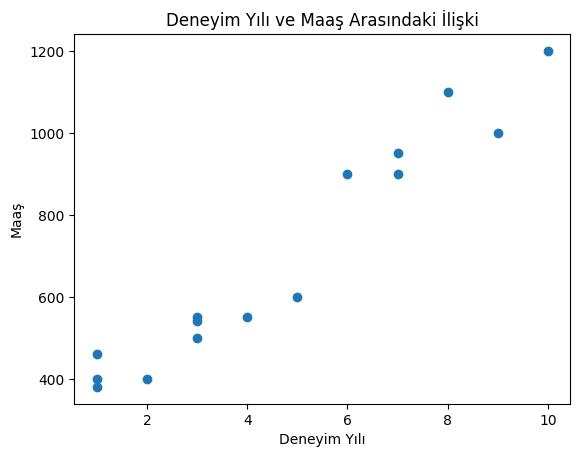

In [5]:
#Deneyim Yılı ve Maaş Arasındaki İlişkiye bakalım.
plt.scatter(df["deneyim_yili"], df["maas"])
plt.xlabel("Deneyim Yılı")
plt.ylabel("Maaş")
plt.title("Deneyim Yılı ve Maaş Arasındaki İlişki")
plt.show()

In [6]:
X = df[["deneyim_yili"]]
y = df[["maas"]] #bağımlı değişkenimiz

"""Bir köşeli parantez içindeki maas ifadesi, df DataFrame'inin bir sütunu olarak seçilir ve ikinci köşeli parantez içindeki ekstra köşeli parantezler,
 bu sütunu bir DataFrame olarak saklamak için kullanılır. Yani, sonuç olarak, y değişkeni, maas sütununu içeren bir DataFrame'dir."""

###### Model ######

# Bias=275,
# Weight=90 (y’=b+wx)

#tek değişkenimiz olduğu için
# y_hat = b + w*x        (sabit + ağırlık * ilgili bağımsız değişken)
# yani bizim x imiz Deneyim yılı


reg_model = LinearRegression().fit(X, y)



In [7]:
# sabit (b - bias)
reg_model.intercept_[0] = 275
reg_model.intercept_[0]

275.0

In [8]:
# maas'ın katsayısı (ağırlığı) (w1)- bağımsız değişken
reg_model.coef_[0][0] = 90
reg_model.coef_[0][0]


90.0

### 2-Oluşturduğunuz model denklemine göre tablodaki tüm deneyim yılları için maaş tahmini yapınız.
---

In [9]:
df["maas_tahmin"] = reg_model.predict(df[["deneyim_yili"]])
df

#(sabit + bağımsız değişken * ilgili bağımsız değişken)

#reg_model.intercept_[0] + reg_model.coef_[0][0] * deneyim_yili

# 275 + 90 * 5 = 725 kontrol edelim.

,deneyim_yili,maas,maas_tahmin
0,5,600,725.00
1,7,900,905.00
2,3,550,545.00
3,3,500,545.00
4,2,400,455.00
5,7,950,905.00
6,3,540,545.00
7,10,1200,1175.00
8,6,900,815.00
9,4,550,635.00


In [10]:
df.describe().T
#Max değerleri inceleyelim, max maaş ve max tahmini maaşı karşılaştırdığımızda birbirine yakın olduğunu gözlemliyoruz.

,count,mean,std,min,25%,50%,75%,max
deneyim_yili,15.00,4.67,3.02,1.00,2.50,4.00,7.00,10.00
maas,15.00,695.33,280.66,380.00,480.00,550.00,925.00,1200.00
maas_tahmin,15.00,695.00,271.42,365.00,500.00,635.00,905.00,1175.00


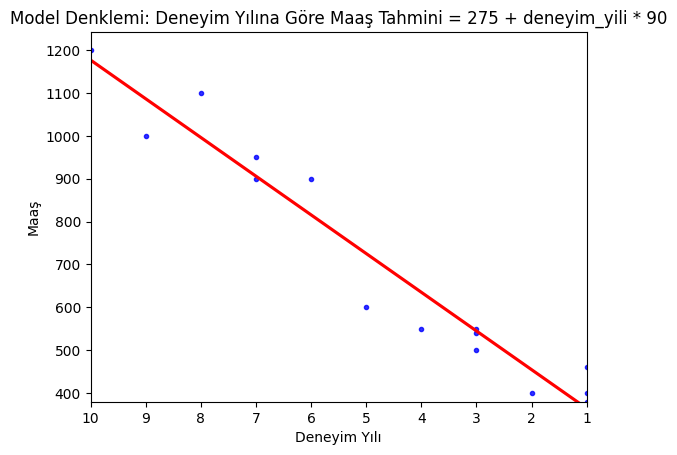

In [20]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Deneyim Yılına Göre Maaş Tahmini = {round(reg_model.intercept_[0])} + deneyim_yili * {round(reg_model.coef_[0][0])}")
g.set_ylabel("Maaş")
g.set_xlabel("Deneyim Yılı")
plt.xlim(df["deneyim_yili"].max(),df["deneyim_yili"].min())
plt.ylim(df["maas"].min())
plt.show()


#x bağımsız değişken y bağımlı değişkenimiz.
# scatter_kws grafikte kullanılacak rekler. 
# g.set_title Grafik başlığımız.
# g.set_ylabel("Maaş") y eksenindeki title. 
# g.set_xlabel("Deneyim Yılı") x eksenindeki title
#plt.xlim(df["deneyim_yili"].max(),df["deneyim_yili"].min()) x eksenini deneyim yilindaki max ve min değerler aralığında göster. 
# plt.ylim(df["maas"].min()) y aralığını minimum maaştan başlayark göster.
#ci=güven aralığı ekleme



### 3-Modelin başarısını ölçmek için MSE, RMSE, MAE skorlarını hesaplayınız
---



- **MSE (Mean Squared Error):** Gerçek ve tahmin edilen değerler arasındaki farkların karesinin ortalamasını hesaplar.
Küçük bir MSE değeri, modelin gerçek değerlerle tahmin edilen değerler arasındaki farkı düşük olduğu anlamına gelir. Bu durumda modelin tahminleri gerçek değerlere daha yakındır ve modelin performansı iyi olarak kabul edilebilir.

In [12]:
# Ortalama hatamızı bulalım.
# MSE

# Bağımlı değişken

y_true = df['maas']

# Tahmin edilen değerler
y_pred = df['maas_tahmin']

mse = mean_squared_error(y_true, y_pred)
mse

4438.333333333333

In [13]:
#bağımlı değişkenimizin ortalamasını alalım.
y_true.mean()

695.3333333333334

In [14]:
#bağımlı değişkenimizin standart sapmasına bakalım.
y_true.std()
# yani 695.33 - 280.66 = 414,67 ve 695.33 + 280.66 = 975.99 arasında değerler değişiyor gibi gözüküyor. 

# Bu değer yüksek bir MSE değeridir. Modelin performansının düşük olduğunu gösterir.
#  Bu nedenle, modele ait tahminler gerçek değerlerle uyumsuzdur ve modelin daha iyi bir şekilde eğitilmesi gerekmektedir.

280.65908823610863

- **RMSE (Root Mean Squared Error):** bir makine öğrenmesi modelinin tahminlerinin gerçek değerlerden ne kadar sapma gösterdiğini ölçen bir hata metriğidir.RMSE, MSE (Mean Squared Error) değerinin karekökü alınarak hesaplanır. 

In [15]:
# RMSE
np.sqrt(mean_squared_error(y_true, y_pred))

66.62081756728398

- **MAE (Mean Absolute Error):** gerçek değerler ile tahmin edilen değerler arasındaki farkların mutlak değerlerinin ortalamasını alarak hesaplanır. Bu farkların mutlak değerlerinin alınması, farkların pozitif veya negatif olmasından bağımsız olarak, sapmaların büyüklüğünün aynı şekilde hesaplanmasını sağlar.

In [16]:
# MAE
mean_absolute_error(y_true, y_pred)


54.333333333333336

### Yorum : 
* MSE ve RMSE değerleri oldukça yüksek. Bu, modelin maas tahminleri konusunda oldukça yanıltıcı olduğunu ve tahminlerin gerçek değerlerle oldukça farklı olduğunu gösterir. Daha düşük MSE, RMSE ve MAE değerleri için modelin daha iyi hale getirilmesi gerekebilir.

--Ek Bilgi --
- **R-Kare (R-Squared):** bir makine öğrenmesi modelinin ne kadar iyi uyduğunu ölçen bir performans metriğidir. R-Kare, modelin açıkladığı varyansın veri setindeki toplam varyansa oranını gösterir. Bu, modelin bağımsız değişkenlerin varyasyonlarının ne kadarını açıklayabildiğini gösterir.
R-Kare değeri, 0 ile 1 arasında bir değer alır. R-Kare değeri 1'e yakınsa, model bağımsız değişkenlerin neredeyse tamamını açıklıyor demektir. R-Kare değeri 0'a yakınsa, modelin bağımsız değişkenleri açıklama oranı çok düşük demektir.

In [17]:
# R-KARE
# reg_model.score(X, y) 
# bu modelde  deneyim değişkenin, maaş değişkendeki değişikliği açıklama yüzdesi.
#Bu modelde bağımsız değişkenler, bağımlı değişkenin %93'nü açıklayabilmektedir.
# R-kare değeri 0.93 olduğu için, veri setindeki değişkenler arasında oldukça yüksek bir ilişki avrdır.

In [19]:
df["Hata"] = df["maas"] - df["maas_tahmin"]
df["Hata_Kareleri"] = df["Hata"]**2
df["Mutlak_Hata"] = [abs(i) for i in df["Hata"]]
df
#abs mutlak değer alır.

,deneyim_yili,maas,maas_tahmin,Hata,Hata_Kareleri,Mutlak_Hata
0,5,600,725.00,-125.00,15625.00,125.00
1,7,900,905.00,-5.00,25.00,5.00
2,3,550,545.00,5.00,25.00,5.00
3,3,500,545.00,-45.00,2025.00,45.00
4,2,400,455.00,-55.00,3025.00,55.00
5,7,950,905.00,45.00,2025.00,45.00
6,3,540,545.00,-5.00,25.00,5.00
7,10,1200,1175.00,25.00,625.00,25.00
8,6,900,815.00,85.00,7225.00,85.00
9,4,550,635.00,-85.00,7225.00,85.00


### Yorum:

- Tahmini maaşlar için veri setimizi incelediğimizde modelimiz bazı durumlarda iyi performas gösterirken ( örn:1. index ) diğer çoğu durumda tahmin edilen maaş, gerçek maaşa oldukça uzak. (örn:0.index ). 